#Bead finding tests

The point of this exercise is to tune the peak-finding parameters for `BeadCalibrationOp.estimate()`.  The various FCS files are Spherotech RCP-30-5A rainbow beads (Lot AF02) collected at various voltages.

This code also demonstrates handling FCS files at a lower level than Cytoflow.Experiment() allows.

In [1]:
%matplotlib inline

from __future__ import division

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import scipy.signal
import math
import FlowCytometryTools as fc

Specimen_001_100_003.fcs
Specimen_001_200_004.fcs
Specimen_001_300_005.fcs
Specimen_001_400_006.fcs
Specimen_001_500_007.fcs
Specimen_001_600_008.fcs
Specimen_001_700_009.fcs
Specimen_001_800_010.fcs
Specimen_001_900_011.fcs
Specimen_001_1000_012.fcs


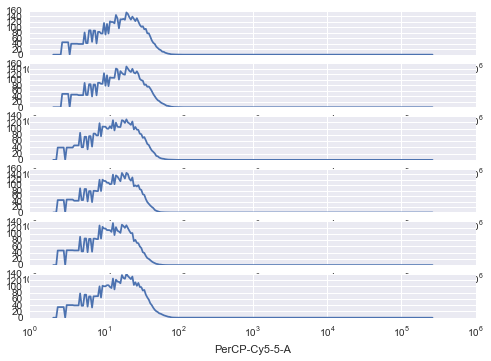

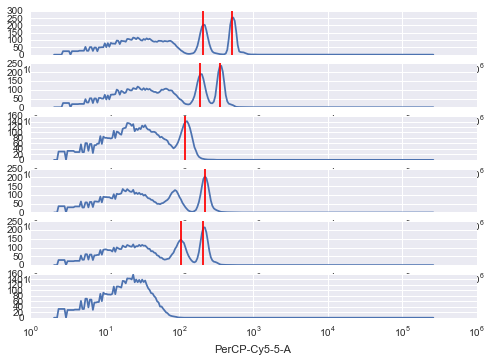

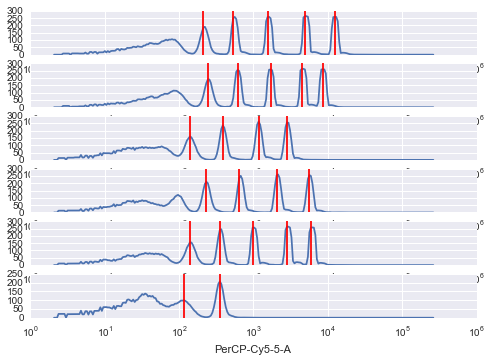

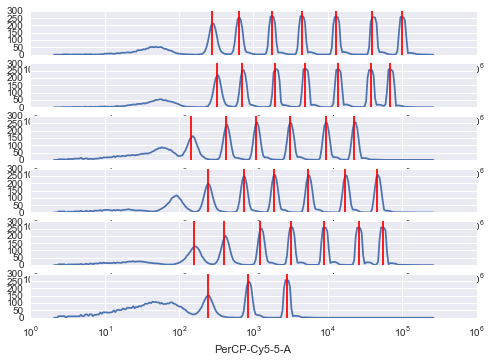

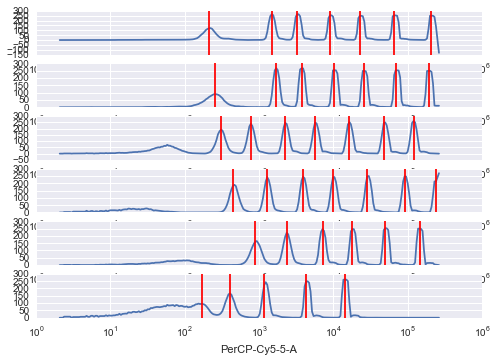

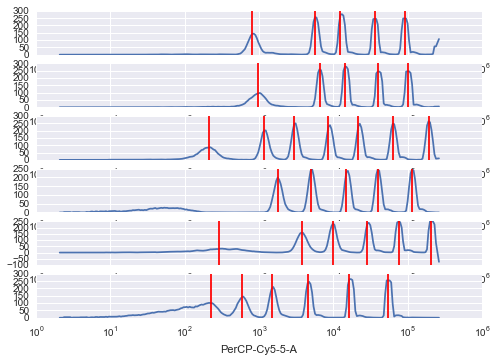

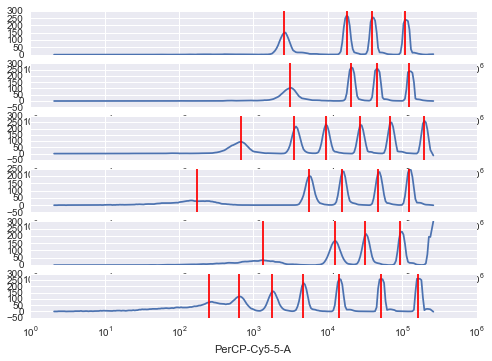

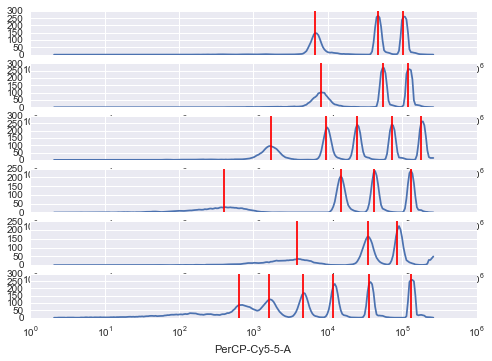

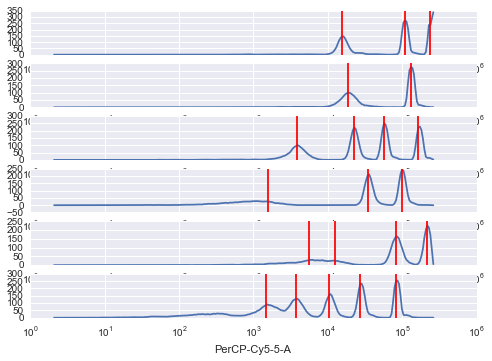

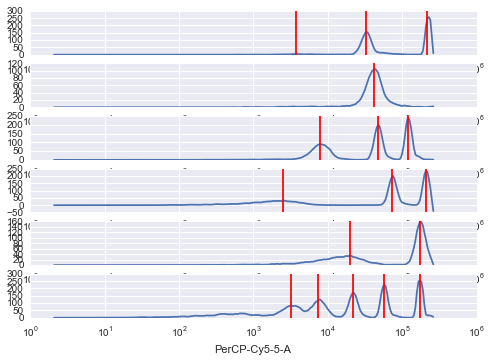

In [2]:
channels = ["Pacific Blue-A", "AmCyan-A", "PE-A", 
            "PE-Texas Red-A", "FITC-A", "PerCP-Cy5-5-A"]

for v, n in [("100", "003"), ("200", "004"), ("300", "005"), ("400", "006"), ("500", "007"),
             ("600", "008"), ("700", "009"), ("800", "010"), ("900", "011"), ("1000", "012")]:
    
    beads_file = "Specimen_001_{0}_{1}.fcs".format(v, n)
    print beads_file
    
    tube = fc.FCMeasurement(ID=v, datafile = beads_file)
    
    plt.figure()
    
    for idx, channel in enumerate(channels):
        data = tube.data[channel]
            
        # bin the data on a log scale
        data_range = 262144
        hist_bins = np.logspace(1, math.log(data_range, 2), num = 256, base = 2)
        hist = np.histogram(data, bins = hist_bins)
        hist[0][0] = 0
        hist[0][-1] = 0

        hist_smooth = scipy.signal.savgol_filter(hist[0], 5, 1)

        # find peaks
        peak_bins = scipy.signal.find_peaks_cwt(hist_smooth, 
                                                widths = np.arange(3, 20),
                                                max_distances = np.arange(3, 20) / 2)

        # filter by height and intensity
        peak_threshold = np.percentile(hist_smooth, 80)
        peak_bins_filtered = \
            [x for x in peak_bins if hist_smooth[x] > peak_threshold and hist[1][x] > 100]

        plt.subplot(len(channels), 1, idx+1)
        plt.xscale('log')
        plt.xlabel(channel)
        plt.plot(hist_bins[1:], hist_smooth)
        for peak in peak_bins_filtered:
            plt.axvline(hist_bins[peak], color = 'r')       